In [2]:
%load_ext autoreload
%autoreload 2
import torch

In [3]:
from diffusers import StableDiffusionPipeline
from misc.cross_frame_attn import CrossFrameAttnProcessor

device = torch.device('cuda')
torch_dtype = torch.float16
sd_repo = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    sd_repo,
    device=device,
    torch_dtype=torch_dtype
)
cross_frame_processor = CrossFrameAttnProcessor(unet_chunk_size=2)
pipe.unet.set_attn_processor(processor=cross_frame_processor)
pipe.enable_model_cpu_offload(gpu_id=0)

Keyword arguments {'device': device(type='cuda')} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:01,  4.64it/s]/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]


100%|██████████| 50/50 [00:12<00:00,  3.99it/s]


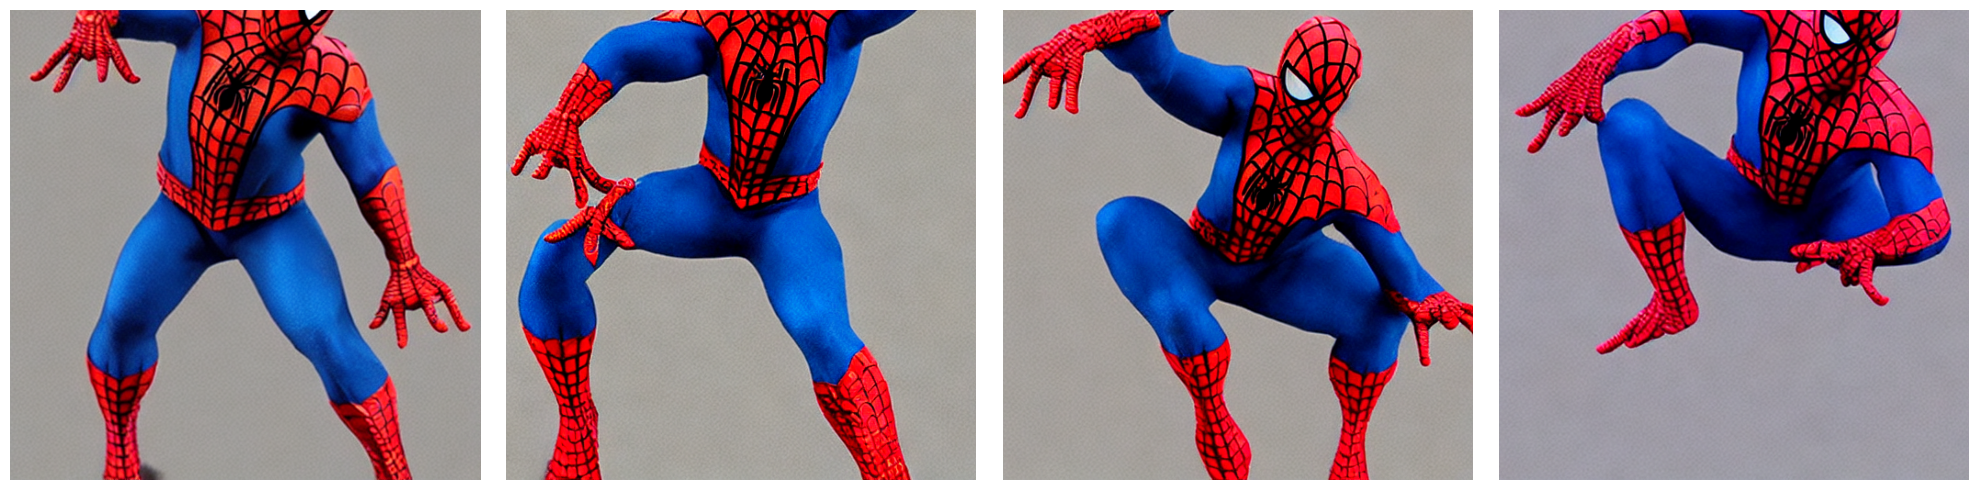

: 

In [4]:
from text3d2video.ipython_utils import display_ims

batch_size = 4
ims = pipe(["Spiderman"] * batch_size).images

display_ims(ims, scale=5)